In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.aberrations

This example introduces the module deeptrack.aberrations.

## 1. What is an aberration?



Aberrations are some alteration of the pupil function of an optical system. They receive as input the complex pupil function in Fourier space. The method `.get()` may optionally receive the position of each pixel in polar coordinates through the keyword arguments `rho` and `theta`. 

The feature, or set of features, is passed to the optical system on initilization through the `aberration` keyword.

## 2. Example of an aberration

Below is the implementation of the feature `GaussianApodization`. It scales the amplitude of the pupil as a function of the distance from the central pixel.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deeptrack.aberrations import Aberration

# Implementation of abstract class Aberration
# which decreases the amplitude of the pupil at high frequencies.
class GaussianApodization(Aberration):
    def get(self, pupil, sigma=1, rho=None, **kwargs):
        return pupil * np.exp(-(rho / sigma) ** 2) 

## 3. The effect of different aberrations

Here we show aberrations in use. We study the point spread function of an aberrated particle and an unaberrated particle in focus, 10 micron under focus and 10 micron over focus. 

In [3]:
from deeptrack.scatterers import PointParticle
from deeptrack.optics import Fluorescence

particle = PointParticle(
    position=(32, 32),
    position_unit="pixel",
    intensity=1
)

unaberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(128, 128, 128, 128),
    upscale=4
)

unaberrated_particle = unaberrated_optics(particle)

def plot(unaberrated, aberrated):
    plt.subplot(2,3,1)
    im = aberrated.resolve(z=-100)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.ylabel("Aberrated")
    plt.title("Focus: -1 mu")
    
    plt.subplot(2,3,2)
    im = aberrated.resolve(z=0)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.title("Focus: 0 mu")
    
    plt.subplot(2,3,3)
    im = aberrated.resolve(z=100)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.title("Focus: 1 mu")
    
    
    plt.subplot(2,3,4)
    im = unaberrated.resolve(z=-100)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.ylabel("Unaberrated")
    #plt.title("Focus: -1 mu")
    
    plt.subplot(2,3,5)
    im = unaberrated.resolve(z=0)
    plt.imshow(im[:, :, 0], cmap="gray")
    #plt.title("Focus: 0 mu")
    
    plt.subplot(2,3,6)
    im = unaberrated.resolve(z=100)
    plt.imshow(im[:, :, 0], cmap="gray")
    #plt.title("Focus: 1 mu")

### SphericalAberration

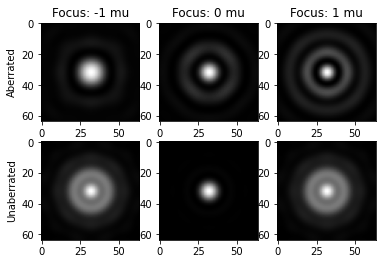

In [4]:
from deeptrack.aberrations import SphericalAberration
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=SphericalAberration(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### Apodization

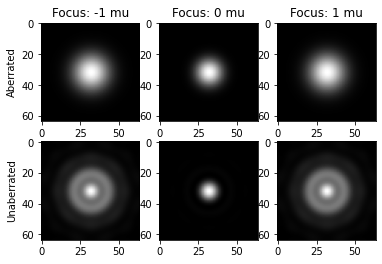

In [5]:
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=GaussianApodization(sigma=0.5)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### Piston

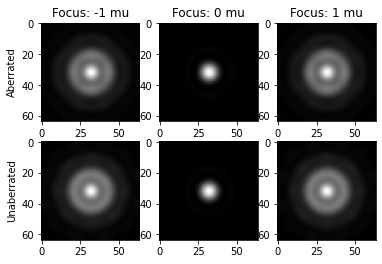

In [6]:
from deeptrack.aberrations import Piston

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=Piston(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### VerticalTilt

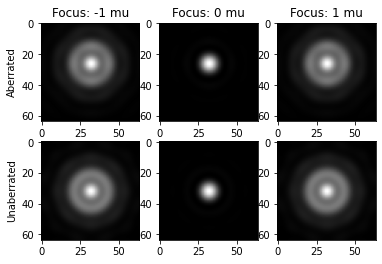

In [7]:
from deeptrack.aberrations import VerticalTilt

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=VerticalTilt(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### HorizontalTilt

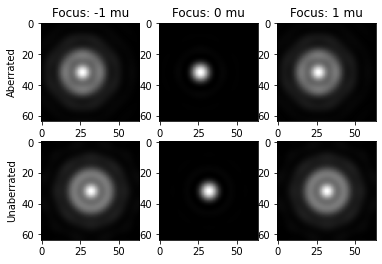

In [8]:
from deeptrack.aberrations import HorizontalTilt
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=HorizontalTilt(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### ObliqueAstigmatism

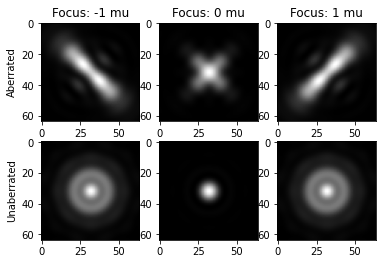

In [9]:
from deeptrack.aberrations import ObliqueAstigmatism
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=ObliqueAstigmatism(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### Defocus

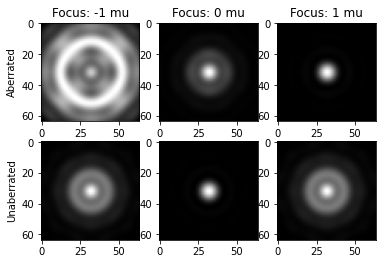

In [10]:
from deeptrack.aberrations import Defocus
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=Defocus(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### Astigmatism

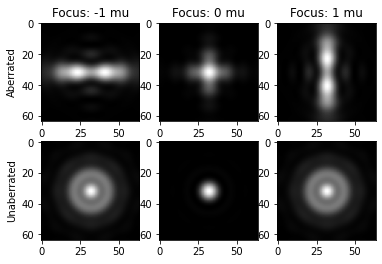

In [11]:
from deeptrack.aberrations import Astigmatism
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=Astigmatism(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### ObliqueTrefoil

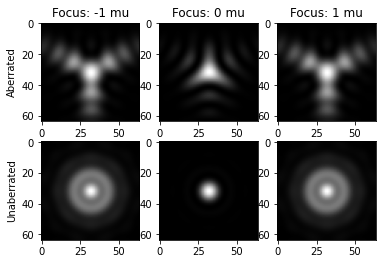

In [12]:
from deeptrack.aberrations import ObliqueTrefoil
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=ObliqueTrefoil(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### VerticalComa

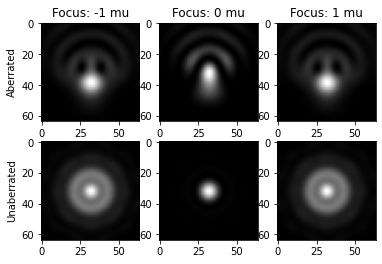

In [13]:
from deeptrack.aberrations import VerticalComa
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=VerticalComa(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### HorizontalComa

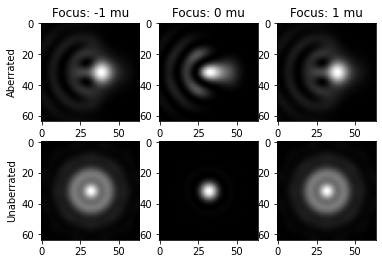

In [14]:
from deeptrack.aberrations import HorizontalComa
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=HorizontalComa(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)

### Trefoil

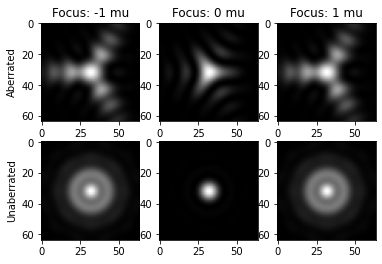

In [15]:
from deeptrack.aberrations import Trefoil
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    aberration=Trefoil(coefficient=1)
)

aberrated_particle = aberrated_optics(particle)

plot(unaberrated_particle, aberrated_particle)